In [1]:
import h5py
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import roc_curve, roc_auc_score
from tqdm import trange
from matplotlib import pyplot
from RNA_gene_predictions import workflow

/opt/apps/rhel7/Python-GPU-3.6.5/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
f1 = h5py.File("auc_data.hdf5", "r")
data = f1['data']
meta = f1['meta']

In [3]:
enrichr_dataset = ['go_bp_', 'mgi_', 'kegg_']

In [4]:
tcga_genes = [str(g[0])[2:-1] for g in meta['tcga_genes']]
curr_gene = tcga_genes[2]

# Predicted biological processes

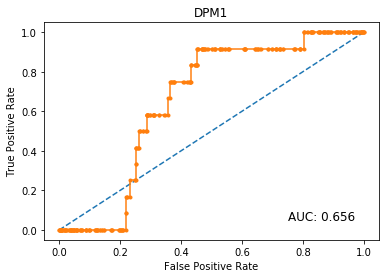

In [5]:
top_pheno = workflow(enrichr_dataset[0], tcga_genes, curr_gene)

# Predicted mouse phenotypes (MGI)

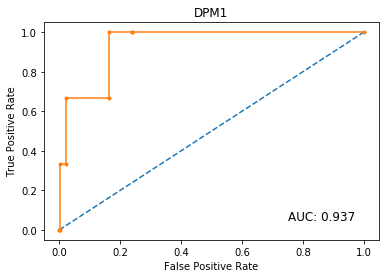

In [6]:
top_pheno = workflow(enrichr_dataset[1], tcga_genes, curr_gene)

# Predicted pathways (KEGG)

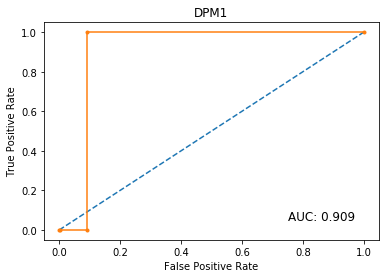

In [7]:
top_pheno = workflow(enrichr_dataset[2], tcga_genes, curr_gene)

# Workflow

In [8]:
curr = enrichr_dataset[1]

In [9]:
gslib = data['tcga_' + curr + 'gslib']
curr_genes = [str(g[0])[2:-1] for g in meta[curr + 'genes']]
curr_pheno = [str(g[0])[2:-1] for g in meta[curr + 'pheno']]
curr_gslib = data[curr + 'gslib']
binary_matrix = data[curr + "bin_mat"]

In [10]:
idx = np.where(np.array(tcga_genes) == curr_gene)[0][0]

In [11]:
bin_idx = np.where(np.transpose(curr_genes)==curr_gene)[0][0]

In [12]:
tups = list(dict(zip(range(len(gslib[0])), gslib[idx])).items())
tups.sort(key = lambda t: t[1], reverse = True)
top_rank = [ t[0] for t in tups[: 50] ]
top_pheno = [ curr_pheno[i] for i in top_rank ]

In [13]:
y = binary_matrix[bin_idx]
probs = gslib[idx]
ns_probs = [0 for _ in range(len(y))]
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y, probs)
ns_fpr, ns_tpr, _ = roc_curve(y, ns_probs)

In [14]:
# calculate AUC
auc = roc_auc_score(y, probs)
print('AUC: %.3f' % auc) 

AUC: 0.937


No handles with labels found to put in legend.


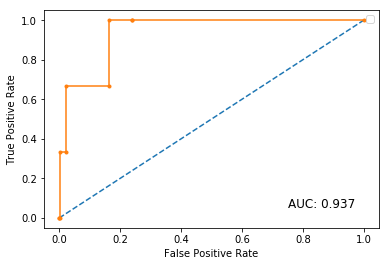

In [15]:
pyplot.plot(ns_fpr, ns_tpr, linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.text(0.75, 0.05, 'AUC: %.3f' % auc, fontsize=12)
pyplot.show()